### Ομάδα 70: 
#### Χρήστος Παπαδημητρίου, el18017
#### Βαρθολομαίος Βαμβακάρης, el18072
#### Ζαχαρίας-Παύλος Αναστασιάδης, el18161

# Dataset : Connectionist Bench (Sonar, Mimes vs. Rocks)

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install seaborn
!pip install markdown
!pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Εισαγωγή & Επισκόπηση

In [2]:
import pandas as pd

df = pd.read_csv('sonar.all-data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
# check if we have any missing values

isNullArray, nullValsPresent = df.isnull(), False

for numCol in isNullArray:
    if True in isNullArray[numCol]:
        print("Missing Values in column: " + str(col))
        flag = True

if not nullValsPresent:
    print("There are no missing data in the Dataset")

There are no missing data in the Dataset


#### Σύντομη Παρουσίαση του Dataset
Το παραπάνω Dataset περιλαμβάνει δείγματα που αντιστοιχούν σε patterns συχνοτήτων. Αυτά τα patterns έχουν προκύψει από την αντανάκλαση σημάτων Sonar σε μεταλλικούς κυλίνδρους και σε πετρώματα. Συγκεκριμένα τα σήματα Sonar που χρησιμοποιήθηκαν είναι "Chirps" αυξανόμενης συχνότητας. Το Dataset περιλαμβάνει αποτελέσματα εκπομπής Sonar από ποικίλες γωνίες (aspect angles), μεχρί 90$^{o}$ για τους μεταλλικούς κυλίνδρους και μέχρι 180$^{o}$ για τα πετρώματα. 

Κάθε pattern περιγράφεται από 60 αριθμούς μεταξύ 0.0 και 1.0. Καθένας από αυτούς τους αριθμούς αντιστοιχεί στο ολοκλήρωμα της ενέργειας μιας συγκεκριμένης μπάντας συχνοτήτων για μια περίοδο στον χρόνο. 

Τα labels που συναντάμε στο dataset είναι 'R' για τα πετρώματα (Rocks) και 'Μ' για τους μεταλλικούς κυλίνδρους (Metal cylinder). 

Σημειώνεται ότι **δεν** χρειάστηκε να γίνουν μετατροπές στο αρχείο 'sonar.all-data' πριν την εισαγωγή του στο Notebook

#### Ακολουθούν κάποιες επιπλέον πληροφορίες για το Dataset:
* Το Dataset περιλαμβάνει 208 δείγματα. Κάθε δείγμα έχει 60 χαρακτηριστηκά. Το καθένα από αυτά είναι μία τιμή μεταξύ 0.0 και 1.1 (Το ολοκλήρωμα της ενέργειας που αναφέραμε παραπάνω) 
* Δεν υπάρχουν επικεφαλίδες, ούτε αρίθμηση γραμμών
* Οι ετικέτες των κλάσεων παίρνουν τιμές 'R' και 'Μ', όπως αναφέραμε παραπάνω. Βρίσκονται στην 61$^{η}$ κολόνα (index 60).
* Δεν υπάρχουν δείγματα με απουσιάζουσες τιμές
* Η κλαση R έχει 97 δείγματα (ποσοστό: 46.6%), ενώ η κλάση M έχει 111 δείγματα (ποσοστό: 53.4%). Σύμφωνα με το όριο 60%-40% πρόκειται για ισορροπημένο Dataset.

## Προετοιμασία

In [4]:
# split the dataframe into features matrix and labels column
features_df, labels_df = df.iloc[:,0:60], df.iloc[:,[60]]
print(labels_df.shape)
print(features_df.shape)

(208, 1)
(208, 60)


In [5]:
# turn features into a numpy array
features_np = features_df.values
features_np

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [6]:
# replace (R,M) with (0,1) in labels 

labels_df = labels_df.replace({'R':0}).replace({'M':1})
labels_np = labels_df.values.flatten()
labels_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split

# split our data into training and testing data
train, test, train_labels, test_labels = train_test_split(features_np, labels_np,
                                                          test_size=0.30,
                                                          random_state=42,
                                                          stratify = labels_np # keep proportions when spliting
                                                         )

## Ταξινόμηση

In [14]:
# import all classifiers 
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Επίδοση Out-Of-the-Box

In [15]:
# Dummy Classifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

accuracy_scores_ootb = dict()
f1_scores_ootb = dict()
dummy_classifiers = [(dc_uniform, 'dc uniform'), (dc_constant_0, 'dc constant 0'),\
                       (dc_constant_1, 'dc constant 1'), (dc_most_frequent, 'dc most frequent'),\
                       (dc_stratified, 'dc stratified')]

for (classifier, name) in dummy_classifiers:
    # train 
    model = classifier.fit(train, train_labels)
    # predict for test data
    preds = classifier.predict(test)
    # calculate accuracy
    accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
    # calculate f1 scores
    f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

In [16]:
# Gaussian Naive Bayes Classifier

name = 'gnb'
gnb = GaussianNB()
#train
model = gnb.fit(train, train_labels)
# predict for test data
preds = gnb.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
# f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)
f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

In [17]:
# K-Nearest-Neighbours

name = 'knn'
knn = KNeighborsClassifier()
# train
knn.fit(train, train_labels)
# predict for test data
preds = knn.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
# f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)
f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

In [18]:
name = 'logisticRegression'
logReg = LogisticRegression()

# train
logReg.fit(train, train_labels)
# predict for test data
preds = logReg.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
# f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)
f1_scores_ootb[name] = round(f1_score(test_labels, preds),3)

**Παρουσίαση Επίδοσης Out-of-the-Box:**

In [19]:
# print results
from IPython.display import display, Markdown, Latex

disp = """
| Classifier | Accuracy | F1-score |
| :-: | :-: | :-: |
"""

for name in accuracy_scores_ootb.keys():
    disp += "|"+name+"|"+str(accuracy_scores_ootb[name])+"|"+str(f1_scores_ootb[name])+"|\n"

display(Markdown(disp))



| Classifier | Accuracy | F1-score |
| :-: | :-: | :-: |
|dc uniform|0.444|0.426|
|dc constant 0|0.46|0.0|
|dc constant 1|0.54|0.701|
|dc most frequent|0.54|0.701|
|dc stratified|0.476|0.571|
|gnb|0.762|0.769|
|knn|0.794|0.822|
|logisticRegression|0.778|0.794|


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# functions to plot bar charts

def plotBarChart(x, ylist, cols, labs, tit, xlab, ylab):
    plt.clf()
    xaxis = np.arange(len(x))

    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    fig, ax = plt.subplots(figsize=(15,8))
    
    for i in range(len(ylist)):
        fig = plt.bar(xaxis+offset[i], ylist[i], color=cols[i], label=labs[i], width=0.2)

    # correct the xticklabels
    ax.set_xticks(xaxis)
    ax.set_xticklabels(x)
    
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(tit)
    
def plotBarChartDoubleAxes(x,ylist,cols,labs,tit,xlab,ylabList):
    xaxis = np.arange(len(x))
    
    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    
    
    fig, ax0 = plt.subplots(figsize=(15,9))
    # create second set of axes with same x axis
    ax1 = ax0.twinx()
    
    ax0.set_yticks([i/10 for i in range(11)])
    # plot       
    ax0.bar(xaxis+offset[0], ylist[0], color=cols[0], label=labs[0], width=0.2)
    ax1.bar(xaxis+offset[1], ylist[1], color=cols[1], label=labs[1], width=0.2)
    
    # ylabels
    ax0.set_ylabel(ylabList[0])
    ax1.set_ylabel(ylabList[1])
    
    # correct the xticklabels
    ax0.set_xticks(xaxis)
    ax0.set_xticklabels(x)
    
    
    ax0.legend(loc='upper right', bbox_to_anchor=(0.95,0.99))
    ax1.legend(loc='upper right', bbox_to_anchor=(0.95,0.94))
    ax0.set_xlabel(xlab)
    plt.title(tit)   

<Figure size 432x288 with 0 Axes>

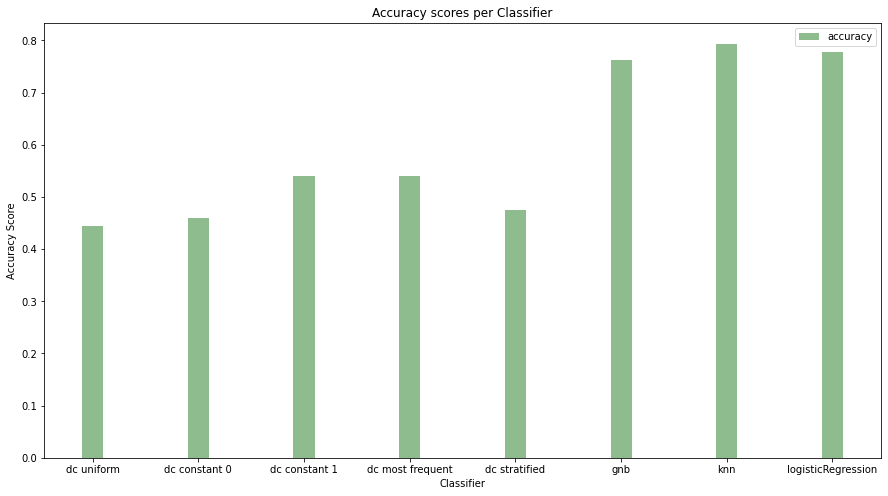

In [21]:
xaxis, yaxis = [], []
for (key, val) in accuracy_scores_ootb.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['darkseagreen'], ['accuracy'],\
             'Accuracy scores per Classifier', 'Classifier', 'Accuracy Score')

<Figure size 432x288 with 0 Axes>

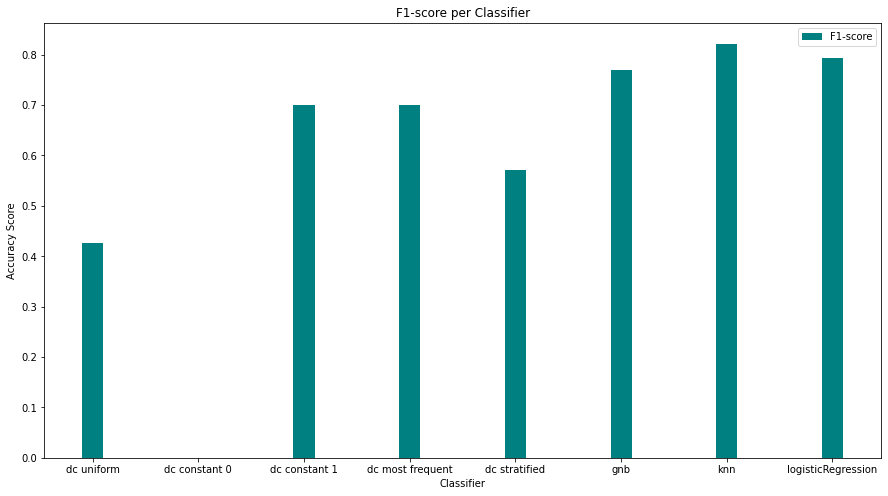

In [22]:
xaxis, yaxis = [], []
for (key, val) in f1_scores_ootb.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['teal'], ['F1-score'],\
             'F1-score per Classifier', 'Classifier', 'Accuracy Score')

## Βελτιστοποίηση

In [23]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle= True, random_state=42)

**Προεπεξεργασία**

Σε επίπεδο προεπεξεργασίας θα χρησιμοποιήσουμε τις εξής τεχνικές:
* **Μείωση διαστατικότητας**. Για αυτόν τον σκοπό θα πειραματιστούμε με Variance Threshold και PCA. 

* **Εξισορρόπηση των κλάσεων**. Για αυτόν τον σκοπό θα χρησιμοποιήσουμε Random oversampling.

* **Κανονικοποίηση**. Για αυτόν τον σκοπό θα πειραματιστούμε με Standard Scaling και Min-Max Scaling.

Παρακάτω θα εντάξουμε αυτες τις τεχνικές στα πλαίσια γενικότερων Pipelines.

In [25]:
train_variance = train.var(axis=0)
# print(train_variance)

# maximum variance
max_variance = np.max(train_variance)
max_variance

0.07404667920760999

**Εύρεση Βέλτιστων Υπερπαραμέτρων**
**(Διασταυρούμενη Επικύρωση με Αναζήτηση Πλέγματος)**

Για κάθε ταξινομητή και κάθε μετρική θα κάνουμε πρώτα μία αναζήτηση σε μεγαλύτερα εύρη υπερπαραμέτρων για να εντοπίσουμε _καλές περιοχές_. Στη συνέχεια, με βάση τα απότελέσματά μας στην προηγούμενη φάση θα κάνουμε μία πιο συγκεκριμένη αναζήτηση, για να καταλήξουμε στον βέλτιστο ταξινομητή.

In [26]:
accuracy_scores_best = dict()
f1_scores_best = dict()
accuracy_test_time = dict()
accuracy_train_time = dict()
f1_test_time = dict()
f1_train_time = dict()
cnf_matrices = dict()

### *Gaussian Naive Bayes*

In [50]:
# create pipeline to perform preprocessing and fitting
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

In [51]:
# parameters for the grid

# variance thresholds
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

# number of components for pca 
# n_components = [8,9,10,11,12,13,17,18,19,20]
n_components = [5,10,20,30,40,45]

#smoothing
smoothing = np.logspace(0,-12, num=15)

**GNB - Βελτιστοποίηση ως προς το F1-score**

In [32]:
estimator_f1_score_gnb = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds,
                              pca__n_components=n_components,
                              gnb__var_smoothing = smoothing
                             ),
                         cv=cv,
                         scoring='f1_macro',
                         n_jobs=-1)

In [33]:
# find best parameters according to f1-score metric
estimator_f1_score_gnb.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()), ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gnb__var_smoothing': array([1.00000000e+00, 1.38949549e-01, 1.93069773e-02, 2.68269580e-03,
       3.72759372e-04, 5.17947468e-05, 7.19685673e-06, 1.00000000e-06,
       1.38949549e-07, 1.93069773e-08, 2.68269580e-09, 3.72759372e-10,
       5.17947468e-11, 7.19685673e-12, 1.00000000e-12]),
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [37]:
print(estimator_f1_score_gnb.best_params_)
print('Best f1-score: %s' % estimator_f1_score_gnb.best_score_)

{'gnb__var_smoothing': 1.9306977288832535e-08, 'pca__n_components': 10, 'selector__threshold': 0.0007404667920760999}
Best f1-score: 0.8024526862026862


Με βάση τα παραπάνω αποτελέσματα κάνουμε μία πιό στενή αναζήτηση στην περιοχή των υπερπαραμέτρων που υποδεικνύει η προηγούμενη αναζητηση.

In [39]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

# parameters for the grid
vthresholds_narrow = np.logspace(-3, -5, num=15)

n_components_narrow = [7,8,9,10,11,12,13,14,15]

smoothing_narrow = np.logspace(-7,-9, num=15)

In [40]:
estimator_f1_score_gnb_narrow = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds_narrow,
                              pca__n_components=n_components_narrow,
                              gnb__var_smoothing = smoothing_narrow
                             ),
                         cv=cv,
                         scoring='f1_macro',
                         n_jobs=-1)

In [41]:
estimator_f1_score_gnb_narrow.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()), ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gnb__var_smoothing': array([1.00000000e-07, 7.19685673e-08, 5.17947468e-08, 3.72759372e-08,
       2.68269580...
       1.93069773e-09, 1.38949549e-09, 1.00000000e-09]),
                         'pca__n_components': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'selector__threshold': array([1.00000000e-03, 7.19685673e-04, 5.17947468e-04, 3.72759372e-04,
       2.68269580e-04, 1.93069773e-04, 1.38949549e-04, 1.00000000e-04,
       7.19685673e-05, 5.17947468e-05, 3.72759372e-05, 2.68269580e-05,
       1.93069773e-05, 1.38949549e-05, 1.00000000e-05])},
             scoring='f1_macro')

In [42]:
print(estimator_f1_score_gnb_narrow.best_params_)
print('Best f1-score: %s' % estimator_f1_score_gnb_narrow.best_score_)

{'gnb__var_smoothing': 7.1968567300115284e-09, 'pca__n_components': 10, 'selector__threshold': 7.196856730011529e-05}
Best f1-score: 0.8175355037119744


In [45]:
import time

# train and test the best model again, to calculate the requested times
gnb_f1_best = estimator_f1_score_gnb_narrow.best_estimator_

# find training time
start_time = time.time()
f1_train_time['gnb'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = gnb_f1_best.predict(test)
f1_test_time['gnb'] = (time.time()-start_time)


# calculate f1 scores
f1_scores_best['gnb'] = round(f1_score(test_labels, preds),3)
print(f1_scores_best['gnb'])

0.794


**GNB - Βελτιστοποίηση ως προς το Accuracy**

In [52]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

# parameters for the grid
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

n_components = [5,10,20,30,40,45]

smoothing = np.logspace(0,-12, num=15)


estimator_accuracy_gnb = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds,
                              pca__n_components=n_components,
                              gnb__var_smoothing = smoothing
                             ),
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

In [53]:
# find best parameters according to accuracy metric
estimator_accuracy_gnb.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()), ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gnb__var_smoothing': array([1.00000000e+00, 1.38949549e-01, 1.93069773e-02, 2.68269580e-03,
       3.72759372e-04, 5.17947468e-05, 7.19685673e-06, 1.00000000e-06,
       1.38949549e-07, 1.93069773e-08, 2.68269580e-09, 3.72759372e-10,
       5.17947468e-11, 7.19685673e-12, 1.00000000e-12]),
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='accuracy')

In [54]:
print(estimator_accuracy_gnb.best_params_)
print('Best accuracy: %s' % estimator_accuracy_gnb.best_score_)

{'gnb__var_smoothing': 1.9306977288832535e-08, 'pca__n_components': 10, 'selector__threshold': 7.404667920760998e-05}
Best accuracy: 0.8138095238095238


Με βάση τα παραπάνω αποτελέσματα προχωράμε σε μία πιο συγκεκριμένη αναζήτηση:

In [56]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

# parameters for the grid
vthresholds_narrow = np.logspace(-4,-6,num=15)

n_components_narrow = [7,8,9,10,11,12,13,14,15]

smoothing_narrow = np.logspace(-7,-9, num=15)


estimator_accuracy_gnb_narrow = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds_narrow,
                              pca__n_components=n_components_narrow,
                              gnb__var_smoothing = smoothing_narrow
                             ),
                         cv=cv,
                         scoring='accuracy',
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_gnb_narrow.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()), ('gnb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gnb__var_smoothing': array([1.00000000e-07, 7.19685673e-08, 5.17947468e-08, 3.72759372e-08,
       2.68269580...
       1.93069773e-09, 1.38949549e-09, 1.00000000e-09]),
                         'pca__n_components': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'selector__threshold': array([1.00000000e-04, 7.19685673e-05, 5.17947468e-05, 3.72759372e-05,
       2.68269580e-05, 1.93069773e-05, 1.38949549e-05, 1.00000000e-05,
       7.19685673e-06, 5.17947468e-06, 3.72759372e-06, 2.68269580e-06,
       1.93069773e-06, 1.38949549e-06, 1.00000000e-06])},
             scoring='accuracy')

In [58]:
import time
train_time = dict()
test_time = dict()

# train and test the best model again, to calculate the requested times
gnb_accuracy_best = estimator_accuracy_gnb_narrow.best_estimator_

# find training time
start_time = time.time()
# gnb_accuracy_best.fit(train, train_labels)
accuracy_train_time['gnb'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = gnb_accuracy_best.predict(test)
accuracy_test_time['gnb'] = (time.time()-start_time)

# calculate accuracy
accuracy_scores_best['gnb'] = round(accuracy_score(test_labels, preds),3)
print(accuracy_scores_best['gnb'])

# cnf matrix
cnf_matrices['gnb'] = confusion_matrix(test_labels, preds)

0.794


### *K-Nearest-Neighbours*

In [59]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

In [61]:
# variance thresholds
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000, max_variance/100]

# number of components for pca 
n_components = [5,10,20,30,40,45]

# number of neighbours
k = [1,3,5,7]

**Knn - Βελτιστοποίηση ως προς το F1-score**

In [62]:
estimator_f1_score_knn = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components, 
                              kNN__n_neighbors=k
                             ), 
                         cv=cv, 
                         scoring='f1_macro',
                         n_jobs=-1)

In [63]:
# find best parameters according to f1-score metric
estimator_f1_score_knn.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [1, 3, 5, 7],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [64]:
print(estimator_f1_score_knn.best_params_)
print('Best f1-score: %s' % estimator_f1_score_knn.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}
Best f1-score: 0.8565498218671592


Προχωράμε σε μιά πιο στενή αναζήτηση:

In [66]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

# grid search parameters
vthresholds_narrow = list(set([0]) | set(np.logspace(-10,-14,num=15)))
n_components_narrow = [15,16,17,18,19,20,21,22,23,24,25]
k_narrow = [1,2,3,4]

estimator_f1_score_knn_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds_narrow, 
                              pca__n_components=n_components_narrow, 
                              kNN__n_neighbors=k_narrow
                             ), 
                         cv=cv, 
                         scoring='f1_macro',
                         n_jobs=-1)

# find best parameters according to f1-score metric
estimator_f1_score_knn_narrow.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [1, 2, 3, 4],
                         'pca__n_components': [15, 16, 17, 18, 19, 20, 21, 22,
                                               23, 24, 25],
                         'selector__threshold': [0, 2.6826957952797272e-11,
                                                 5.179474679231223e-13,
                                                 3.727593720314938e-14,
                                                 7.1968567300115285e-12,
                                                 1.389495494373136e-13, 1e-14,
                                                 5.179474679231202e-11,
                                                 2.682695795279727e-13,
                                                 1.389495494373136e-11,
                                                 1.9306977288832535e-14, 1e-10,
                                                 3.727593720314938e-12,
                                                 1.9306977288832537e-12, 1e-12,
                                                 7.196856730011528e-14]},
             scoring='f1_macro')

In [67]:
print(estimator_f1_score_knn_narrow.best_params_)
print('Best f1-score: %s' % estimator_f1_score_knn_narrow.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}
Best f1-score: 0.8565498218671592


In [69]:
import time

# train and test the best model again, to calculate the requested times
knn_f1_best = estimator_f1_score_knn_narrow.best_estimator_

# find training time
start_time = time.time()
# knn_f1_best.fit(train, train_labels)
f1_train_time['knn'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = knn_f1_best.predict(test)
f1_test_time['knn'] = (time.time()-start_time)

f1_scores_best['knn'] = round(f1_score(test_labels, preds),3)
print(f1_scores_best['knn'])

0.886


**Knn - Βελτιστοποίηση ως προς το Accuracy**

In [70]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000, max_variance/100]
n_components = [5,10,20,30,40,45]
k = [1,3,5,7]

estimator_accuracy_knn = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components, 
                              kNN__n_neighbors=k
                             ), 
                         cv=cv, 
                         scoring='accuracy',
                         n_jobs=-1)

In [72]:
# find best parameters according to accuracy metric
estimator_accuracy_knn.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [1, 3, 5, 7],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='accuracy')

In [73]:
print(estimator_accuracy_knn.best_params_)
print('Best accuracy: %s' % estimator_accuracy_knn.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}
Best accuracy: 0.8619047619047621


Κάνουμε μιά πιο στενή αναζήτηση:

In [74]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

vthresholds_narrow = list(set([0]) | set(np.logspace(-10,-14,num=15)))
n_components_narrow = [15,16,17,18,19,20,21,22,23,24]
k_narrow = [1,2,3]

estimator_accuracy_knn_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds_narrow, 
                              pca__n_components=n_components_narrow, 
                              kNN__n_neighbors=k_narrow
                             ), 
                         cv=cv, 
                         scoring='accuracy',
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_knn_narrow.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kNN',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': [1, 2, 3],
                         'pca__n_components': [15, 16, 17, 18, 19, 20, 21, 22,
                                               23, 24],
                         'selector__threshold': [0, 2.6826957952797272e-11,
                                                 5.179474679231223e-13,
                                                 3.727593720314938e-14,
                                                 7.1968567300115285e-12,
                                                 1.389495494373136e-13, 1e-14,
                                                 5.179474679231202e-11,
                                                 2.682695795279727e-13,
                                                 1.389495494373136e-11,
                                                 1.9306977288832535e-14, 1e-10,
                                                 3.727593720314938e-12,
                                                 1.9306977288832537e-12, 1e-12,
                                                 7.196856730011528e-14]},
             scoring='accuracy')

In [75]:
print(estimator_accuracy_knn_narrow.best_params_)
print('Best accuracy: %s' % estimator_accuracy_knn_narrow.best_score_)

{'kNN__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0}
Best accuracy: 0.8619047619047621


In [76]:
import time

# train and test the best model again, to calculate the requested times
knn_accuracy_best = estimator_accuracy_knn_narrow.best_estimator_

# find training time
start_time = time.time()
# knn_accuracy_best.fit(train, train_labels)
accuracy_train_time['knn'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = knn_accuracy_best.predict(test)
accuracy_test_time['knn'] = (time.time()-start_time)

# calculate accuracy
accuracy_scores_best['knn'] = round(accuracy_score(test_labels, preds),3)

# cnf matrix
cnf_matrices['knn'] = confusion_matrix(test_labels, preds)
print(accuracy_scores_best['knn'])

0.873


### *Logistic Regression*

In [87]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

# variance thresholds
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

# number of components for pca 
n_components = [5,10,20,30,40,45]


# max iterations 
iterations = [70,80,100]

# logistic regression classifier parameters
C = np.logspace(-4, 2, num=15)

logReg_solver = ['liblinear','sag','saga']

**Logistic Regression - Βελτιστοποίηση ως προς το F1-Score**

In [88]:
estimator_f1_score_logReg = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components,
                              logReg__C=C,
                              logReg__solver=logReg_solver,
                              logReg__max_iter=iterations
                             ),
                         cv=cv, 
                         scoring='f1_macro', 
                         n_jobs=-1)

# find best parameters according to f1-score metric
estimator_f1_score_logReg.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('logReg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logReg__C': array([1.00000000e-04, 2.68269580e-04, 7.19685673e-04, 1.93069773e-03,
       5.179474...
       2.68269580e-01, 7.19685673e-01, 1.93069773e+00, 5.17947468e+00,
       1.38949549e+01, 3.72759372e+01, 1.00000000e+02]),
                         'logReg__max_iter': [70, 80, 100],
                         'logReg__solver': ['liblinear', 'sag', 'saga'],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [89]:
print(estimator_f1_score_logReg.best_params_)
print("Best F1-score: %s" % estimator_f1_score_logReg.best_score_)

{'logReg__C': 0.1, 'logReg__max_iter': 70, 'logReg__solver': 'sag', 'pca__n_components': 10, 'selector__threshold': 0.0007404667920760999}
Best F1-score: 0.8253278747396393


Προχωράμε σε μιά πιο στενή αναζήτηση:

In [93]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

vthresholds_narrow = np.logspace(-3,-5,num=15)
n_components_narrow = [7,8,9,10,11,12,13,14]
iterations_narrow = [70,80,100]
C_narrow = np.logspace(-2,1,num=20)
# logReg_solver_narrow = ['lbfgs','newton-cg','liblinear','sag','saga']
logReg_solver_narrow = ['sag', 'saga']

estimator_f1_score_logReg_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components_narrow,
                              logReg__C=C_narrow,
                              logReg__solver=logReg_solver_narrow,
                              logReg__max_iter=iterations_narrow
                             ),
                         cv=cv, 
                         scoring='f1_macro', 
                         n_jobs=-1)

# find best parameters according to f1-score metric
estimator_f1_score_logReg_narrow.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('logReg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logReg__C': array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.0885866...
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ]),
                         'logReg__max_iter': [70, 80, 100],
                         'logReg__solver': ['sag', 'saga'],
                         'pca__n_components': [7, 8, 9, 10, 11, 12, 13, 14],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='f1_macro')

In [94]:
print(estimator_f1_score_logReg_narrow.best_params_)
print("Best F1-score: %s" % estimator_f1_score_logReg_narrow.best_score_)

{'logReg__C': 2.3357214690901213, 'logReg__max_iter': 100, 'logReg__solver': 'saga', 'pca__n_components': 10, 'selector__threshold': 0.0007404667920760999}
Best F1-score: 0.8325484809308339


In [97]:
import time

# train and test the best model again, to calculate the requested times
logReg_f1_best = estimator_f1_score_logReg_narrow.best_estimator_

# find training time
start_time = time.time()
# logReg_f1_best.fit(train, train_labels)
f1_train_time['logisticRegression'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = logReg_f1_best.predict(test)
f1_test_time['logisticRegression'] = (time.time()-start_time)

f1_scores_best['logisticRegression'] = round(f1_score(test_labels, preds),3)
print(f1_scores_best['logisticRegression'])

0.8


**Logistic Regression - Βελτιστοποίηση ως προς το Accuracy**

In [100]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]
n_components = [5,10,20,30,40,45]
iterations = [70,80,100]
C = np.logspace(-4, 2, num=15)

logReg_solver = ['liblinear','sag','saga']

estimator_accuracy_logReg = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components,
                              logReg__C=C,
                              logReg__solver=logReg_solver,
                             ),
                         cv=cv, 
                         scoring='accuracy', 
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_logReg.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('logReg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logReg__C': array([1.00000000e-04, 2.68269580e-04, 7.19685673e-04, 1.93069773e-03,
       5.179474...-01,
       2.68269580e-01, 7.19685673e-01, 1.93069773e+00, 5.17947468e+00,
       1.38949549e+01, 3.72759372e+01, 1.00000000e+02]),
                         'logReg__solver': ['liblinear', 'sag', 'saga'],
                         'pca__n_components': [5, 10, 20, 30, 40, 45],
                         'selector__threshold': [0, 7.404667920760999e-08,
                                                 7.404667920760998e-07,
                                                 7.404667920760999e-06,
                                                 7.404667920760998e-05,
                                                 0.0007404667920760999]},
             scoring='accuracy')

In [101]:
print(estimator_accuracy_logReg.best_params_)
print("Best Accuracy: %s" % estimator_accuracy_logReg.best_score_)

{'logReg__C': 0.7196856730011514, 'logReg__solver': 'liblinear', 'pca__n_components': 10, 'selector__threshold': 0.0007404667920760999}
Best Accuracy: 0.8271428571428571


Προχωράμε σε μιά πιο στενή αναζήτηση:

In [102]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

vthresholds = np.logspace(-3,-5,num=20)
n_components_narrow = [7,8,9,10,11,12,13,14]
iterations_narrow = [70,80,100]
C_narrow = [i/100 for i in range(10,100,2)]
logReg_solver_narrow = ['liblinear']

estimator_accuracy_logReg_narrow = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds_narrow, 
                              pca__n_components=n_components_narrow,
                              logReg__C=C_narrow,
                              logReg__solver=logReg_solver_narrow,
                             ),
                         cv=cv, 
                         scoring='accuracy', 
                         n_jobs=-1)

# find best parameters according to accuracy metric
estimator_accuracy_logReg_narrow.fit(train, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('selector', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('sampler', RandomOverSampler()),
                                       ('pca', PCA()),
                                       ('logReg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logReg__C': [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22,
                                       0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36,
                                       0.38, 0....
                         'logReg__solver': ['liblinear'],
                         'pca__n_components': [7, 8, 9, 10, 11, 12, 13, 14],
                         'selector__threshold': array([1.00000000e-03, 7.19685673e-04, 5.17947468e-04, 3.72759372e-04,
       2.68269580e-04, 1.93069773e-04, 1.38949549e-04, 1.00000000e-04,
       7.19685673e-05, 5.17947468e-05, 3.72759372e-05, 2.68269580e-05,
       1.93069773e-05, 1.38949549e-05, 1.00000000e-05])},
             scoring='accuracy')

In [104]:
print(estimator_accuracy_logReg_narrow.best_params_)
print("Best Accuracy: %s" % estimator_accuracy_logReg_narrow.best_score_)

{'logReg__C': 0.34, 'logReg__solver': 'liblinear', 'pca__n_components': 12, 'selector__threshold': 1.9306977288832496e-05}
Best Accuracy: 0.832857142857143


In [107]:
import time

# train and test the best model again, to calculate the requested times
logReg_accuracy_best = estimator_accuracy_logReg_narrow.best_estimator_

# find training time
start_time = time.time()
# logReg_accuracy_best.fit(train, train_labels)
accuracy_train_time['logisticRegression'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = logReg_accuracy_best.predict(test)
accuracy_test_time['logisticRegression'] = (time.time()-start_time)

# calculate accuracy
accuracy_scores_best['logisticRegression'] = round(accuracy_score(test_labels, preds),3)

# cnf matrix
cnf_matrices['logisticRegression'] = confusion_matrix(test_labels, preds)
print(accuracy_scores_best['logisticRegression'])

0.81


## Αποτελέσματα & Συμπεράσματα

In [108]:
# calculate relative metrics
accuracy_scores_relative = dict()
f1_scores_relative = dict()

for name in accuracy_scores_best.keys():
    accuracy_scores_relative[name] =\
     round((accuracy_scores_best[name]-accuracy_scores_ootb[name])*100/accuracy_scores_ootb[name],3)
    f1_scores_relative[name] = \
    round((f1_scores_best[name]-f1_scores_ootb[name])*100/f1_scores_ootb[name],3)    

**Αποτελέσματα με μορφή Πίνακα**

Παρουσιάζουμε τις επιδόσεις των βέλτιστων ταξινομητών κάθε είδους. Η στήλη `Relative Accuracy` περιλαμβάνει τον λόγo του βέλτιστου Accuracy προς το out-of-the-box Accuracy. Το αντίστοιχο ισχύει για την στήλη `Relative F1-score`.

In [109]:
from IPython.display import display, Markdown, Latex
disp = """
| Classifier | F1-score | F1-score Improvement | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
"""

for name in f1_scores_best.keys():
    disp += "|"+name+"|"+str(f1_scores_best[name])+"|"+str(f1_scores_relative[name])+'%'\
    "|"+str(f1_train_time[name])+"|"+str(f1_test_time[name])+"|\n"

display(Markdown(disp))


| Classifier | F1-score | F1-score Improvement | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
|gnb|0.794|3.251%|6.318092346191406e-05|0.003231048583984375|
|knn|0.886|7.786%|4.100799560546875e-05|0.03067469596862793|
|logisticRegression|0.8|0.756%|3.933906555175781e-05|0.0010609626770019531|


In [110]:
from IPython.display import display, Markdown, Latex

disp = """
| Classifier | Accuracy | Accuracy Improvement | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
"""

for name in f1_scores_best.keys():
    disp += "|"+name+"|"+str(accuracy_scores_best[name])+"|"+str(accuracy_scores_relative[name])+'%'+\
    "|"+str(accuracy_train_time[name])+"|"+str(accuracy_test_time[name])+"|\n"

display(Markdown(disp))


| Classifier | Accuracy | Accuracy Improvement | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
|gnb|0.794|4.199%|3.5762786865234375e-05|0.0035316944122314453|
|knn|0.873|9.95%|7.963180541992188e-05|0.039170265197753906|
|logisticRegression|0.81|4.113%|3.838539123535156e-05|0.0025212764739990234|


**Αποτελέσματα με μορφή Διαγράμματος**

Παρουσιάζουμε τα αποτελέσματά μας για τους βέλτιστους ταξινομητές κάθε κατηγορίας σε μορφή bar-plots:

In [111]:
# prapare to plot
names, f1_best_axis, accuracy_best_axis, f1_relative_axis, accuracy_relative_axis = [], [], [], [], []

for name in accuracy_scores_best.keys():
    names.append(name)
    f1_best_axis.append(f1_scores_best[name])
    accuracy_best_axis.append(accuracy_scores_best[name])
    f1_relative_axis.append(f1_scores_relative[name])
    accuracy_relative_axis.append(accuracy_scores_relative[name])
    

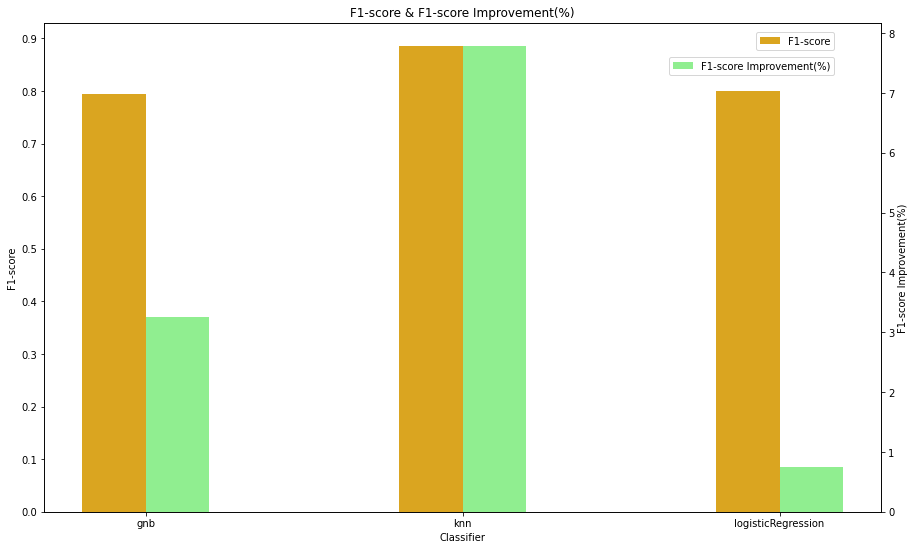

In [113]:
# plot f1 scores
plotBarChartDoubleAxes(names, [f1_best_axis, f1_relative_axis], ['goldenrod','lightgreen'],\
            ['F1-score','F1-score Improvement(%)'],\
             'F1-score & F1-score Improvement(%)', 'Classifier', ['F1-score','F1-score Improvement(%)'])

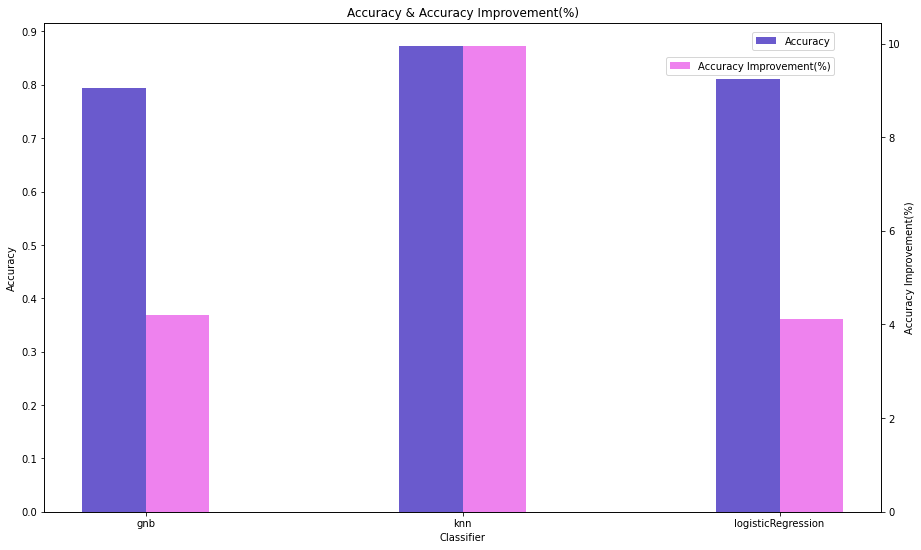

In [114]:
# plot accuracy
plotBarChartDoubleAxes(names, [accuracy_best_axis, accuracy_relative_axis], ['slateblue','violet'],\
            ['Accuracy','Accuracy Improvement(%)'],\
             'Accuracy & Accuracy Improvement(%)', 'Classifier', ['Accuracy','Accuracy Improvement(%)'])


**Σχολιασμός**

**Εκτύπωση Confusion Matrices**

In [115]:
import seaborn as sns

**_Confusion Matrix του Ταξινομητή με την Χειρότερη Ορθότητα:_**

gnb
AxesSubplot(0.125,0.125;0.62x0.755)


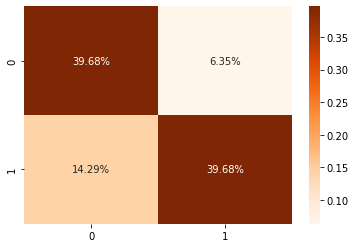

In [116]:
ind = list(accuracy_scores_best.values()).index(min(list(accuracy_scores_best.values())))
name = list(accuracy_scores_best.keys())[ind]
print(name)

print(sns.heatmap(cnf_matrices[name]/np.sum(cnf_matrices[name]), annot=True, fmt='.2%', cmap='Oranges'))

**_Confusion Matrix του Ταξινομητή με την Καλύτερη Ορθότητα:_**

knn
AxesSubplot(0.125,0.125;0.62x0.755)


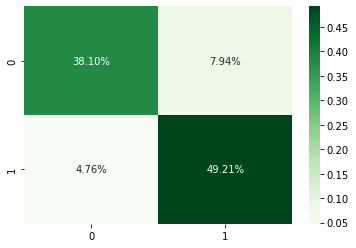

In [117]:
ind = list(accuracy_scores_best.values()).index(max(list(accuracy_scores_best.values())))
name = list(accuracy_scores_best.keys())[ind]
print(name)

print(sns.heatmap(cnf_matrices[name]/np.sum(cnf_matrices[name]), annot=True, fmt='.2%', cmap='Greens'))